# Clustering Tracks

## Processing Tracks Data

In [1]:
# Import libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Read the csv file into a pandas DataFrame
tracks_df = pd.read_csv(Path("Resources/tracks.csv"))

# Review the DataFrame
tracks_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,mode_minor,mode_major,time_signature_0,time_signature_1,time_signature_2,time_signature_3,time_signature_4,time_signature_5,time_signature_6,time_signature_7
0,0.418,0.81600,1,-7.200,1,0.1240,0.00371,0.001640,0.2640,0.8340,...,0,1,0,0,0,0,1,0,0,0
1,0.366,0.03850,1,-29.403,1,0.1600,0.57500,0.000016,0.1050,0.0398,...,0,1,0,0,0,0,1,0,0,0
2,0.649,0.60500,7,-10.186,1,0.0330,0.00945,0.842000,0.3440,0.5310,...,0,1,0,0,0,0,1,0,0,0
3,0.528,0.00676,5,-30.605,1,0.0593,0.99500,0.938000,0.0651,0.0381,...,0,1,0,0,0,1,0,0,0,0
4,0.835,0.56400,0,-11.545,1,0.0673,0.05490,0.000000,0.0879,0.9640,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214987,0.866,0.48800,1,-14.534,1,0.1010,0.00238,0.000104,0.1290,0.4780,...,0,1,0,0,0,0,1,0,0,0
2214988,0.359,0.38700,1,-11.947,1,0.0325,0.76900,0.000003,0.3290,0.2910,...,0,1,0,0,0,0,1,0,0,0
2214989,0.752,0.54200,8,-7.178,0,0.0653,0.42900,0.000000,0.1040,0.9080,...,1,0,0,0,0,0,1,0,0,0
2214990,0.772,0.41200,4,-11.682,1,0.0305,0.37800,0.000199,0.1840,0.6050,...,0,1,0,0,0,0,1,0,0,0


In [3]:
# Check the df columns
tracks_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'track_uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'key_none', 'key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'mode_minor', 'mode_major', 'time_signature_0',
       'time_signature_1', 'time_signature_2', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'time_signature_6',
       'time_signature_7'],
      dtype='object')

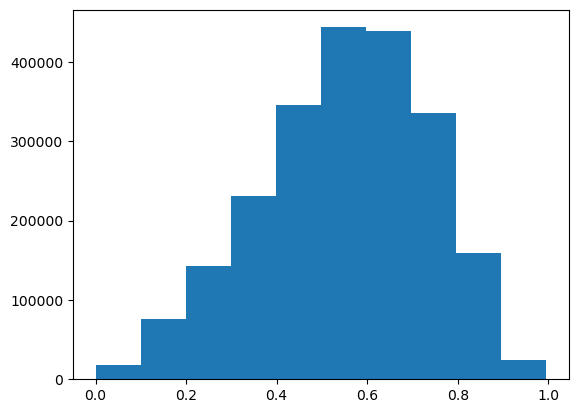

In [4]:
# Check the distribution of each feature
plt.hist(tracks_df['danceability'])
plt.show()

In [5]:
# Keep the columns we want for fitting
tracks_features_df = tracks_df[['track_uri', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','key_none', 'key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'mode_minor', 'mode_major', 'time_signature_0',
       'time_signature_1', 'time_signature_2', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'time_signature_6',
       'time_signature_7']]
# Check out the df
tracks_features_df

,track_uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,mode_minor,mode_major,time_signature_0,time_signature_1,time_signature_2,time_signature_3,time_signature_4,time_signature_5,time_signature_6,time_signature_7
0,spotify:track:37u0UvJxXK8EGWOjbsS2Em,0.418,0.81600,-7.200,0.1240,0.00371,0.001640,0.2640,0.8340,184.122,...,0,1,0,0,0,0,1,0,0,0
1,spotify:track:1qV82Jq1kXV8AS1qimr1JS,0.366,0.03850,-29.403,0.1600,0.57500,0.000016,0.1050,0.0398,168.049,...,0,1,0,0,0,0,1,0,0,0
2,spotify:track:4R0J5oREX8vuljW1OYg8nU,0.649,0.60500,-10.186,0.0330,0.00945,0.842000,0.3440,0.5310,144.155,...,0,1,0,0,0,0,1,0,0,0
3,spotify:track:5drWUoTthqxB0tEb3lLogI,0.528,0.00676,-30.605,0.0593,0.99500,0.938000,0.0651,0.0381,69.314,...,0,1,0,0,0,1,0,0,0,0
4,spotify:track:08YAU8YEzjXbPMBhuwwNjr,0.835,0.56400,-11.545,0.0673,0.05490,0.000000,0.0879,0.9640,109.999,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214987,spotify:track:2qTuN39E6Js6TQ734h8kqZ,0.866,0.48800,-14.534,0.1010,0.00238,0.000104,0.1290,0.4780,101.854,...,0,1,0,0,0,0,1,0,0,0
2214988,spotify:track:633yVO5nYOnszN6b9yR1Eu,0.359,0.38700,-11.947,0.0325,0.76900,0.000003,0.3290,0.2910,88.005,...,0,1,0,0,0,0,1,0,0,0
2214989,spotify:track:6haw7Ma9ebcubusijZ69BO,0.752,0.54200,-7.178,0.0653,0.42900,0.000000,0.1040,0.9080,75.546,...,1,0,0,0,0,0,1,0,0,0
2214990,spotify:track:4Z6wHGFWv1uxPGxuthqQav,0.772,0.41200,-11.682,0.0305,0.37800,0.000199,0.1840,0.6050,108.352,...,0,1,0,0,0,0,1,0,0,0


## Scaling Tracks Data

In [6]:
# Import libraries and dependencies
from sklearn.preprocessing import StandardScaler

In [7]:
# Creating `scaler` 
scaler = StandardScaler()
# Scale the `tracks_features_df` and drop the 'track_uri' column
scaler.fit(tracks_features_df.drop('track_uri',axis=1))
scaled_tracks_features = scaler.transform(tracks_features_df.drop('track_uri',axis=1))

In [8]:
# Create `scaled_tracks_df` for the scaled_tracks
scaled_tracks_features_df = pd.DataFrame(scaled_tracks_features,columns=tracks_features_df.drop('track_uri',axis=1).columns, index=tracks_features_df.index)
# Check out `scaled_tracks_df`
scaled_tracks_features_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,mode_minor,mode_major,time_signature_0,time_signature_1,time_signature_2,time_signature_3,time_signature_4,time_signature_5,time_signature_6,time_signature_7
0,-0.717590,0.868764,0.437295,0.301916,-0.990444,-0.627309,0.289102,1.327155,2.143501,-0.085811,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
1,-0.999385,-2.053931,-3.508668,0.614474,0.621576,-0.631957,-0.548502,-1.614593,1.606274,0.429796,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
2,0.534229,0.075596,-0.093383,-0.488160,-0.974247,1.777799,0.710538,0.204832,0.807637,-0.086604,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
3,-0.121486,-2.173244,-3.722290,-0.259819,1.806698,2.052551,-0.758693,-1.620889,-1.693863,-0.083086,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,2.977897,-2.567278,-0.137138,0.0,0.0
4,1.542188,-0.078527,-0.334907,-0.190362,-0.846000,-0.632003,-0.638584,1.808681,-0.334000,0.017834,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214987,1.710181,-0.364218,-0.866119,0.102227,-0.994197,-0.631705,-0.422071,0.008517,-0.606240,-0.088797,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
2214988,-1.037319,-0.743887,-0.406352,-0.492501,1.168990,-0.631995,0.631518,-0.684138,-1.069131,0.926736,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
2214989,1.092400,-0.161227,0.441205,-0.207726,0.209605,-0.632003,-0.553770,1.601254,-1.485563,-0.017122,...,1.377808,-1.377808,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
2214990,1.200783,-0.649909,-0.359255,-0.509866,0.065697,-0.631433,-0.132334,0.478930,-0.389049,-0.193126,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0


## Finding K Value for Clustering
* Elbow Method

In [9]:
# Import libraries and dependencies
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import hvplot.pandas
import time

In [10]:
# Set up the KMeans model where k is the number for clusters ranging from 1 to 20
start_time = time.time()

inertias =[]
k = list(range(1,20))

for i in k:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_tracks_features_df)
    inertias.append(kmeans.inertia_)

print("--- %s seconds ---" % (time.time() - start_time))

--- 154.381098985672 seconds ---


In [11]:
# Create elbow_df and sil_score_df
elbow_df = pd.DataFrame({
    "k": k,
    "inertia": inertias
})
# Check out `elbow_df`
elbow_df

,k,inertia
0,1,6.423477e+07
1,2,5.870209e+07
2,3,5.500976e+07
3,4,5.272706e+07
4,5,5.070337e+07
5,6,4.877057e+07
6,7,4.672452e+07
7,8,4.570857e+07
8,9,4.369145e+07
9,10,4.180920e+07


In [12]:
# Plot elbow curve
elbow_df.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

## Tracks Clustering 

In [13]:
# Initialize the K-Means model with n_clusters=8
model = KMeans(n_clusters=17)

# Fit the model for the scaled_tracks_df 
model.fit(scaled_tracks_features_df)

# Predict the clusters of tracks
tracks_clusters = model.predict(scaled_tracks_features_df)

# View the tracks clusters
print(tracks_clusters)

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 5  7  1 ... 15  8  2]


In [14]:
# Create a copy of the scaled_tracks_df
clustered_scaled_tracks_features_df = scaled_tracks_features_df.copy()

# Create a new column "track_cluster" for the predicted clusters
clustered_scaled_tracks_features_df["track_cluster"] = tracks_clusters
clustered_scaled_tracks_features_df['track_uri']=tracks_features_df['track_uri']

# Review the DataFrame
clustered_scaled_tracks_features_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,time_signature_0,time_signature_1,time_signature_2,time_signature_3,time_signature_4,time_signature_5,time_signature_6,time_signature_7,track_cluster,track_uri
0,-0.717590,0.868764,0.437295,0.301916,-0.990444,-0.627309,0.289102,1.327155,2.143501,-0.085811,...,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0,5,spotify:track:37u0UvJxXK8EGWOjbsS2Em
1,-0.999385,-2.053931,-3.508668,0.614474,0.621576,-0.631957,-0.548502,-1.614593,1.606274,0.429796,...,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0,7,spotify:track:1qV82Jq1kXV8AS1qimr1JS
2,0.534229,0.075596,-0.093383,-0.488160,-0.974247,1.777799,0.710538,0.204832,0.807637,-0.086604,...,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0,1,spotify:track:4R0J5oREX8vuljW1OYg8nU
3,-0.121486,-2.173244,-3.722290,-0.259819,1.806698,2.052551,-0.758693,-1.620889,-1.693863,-0.083086,...,-0.03769,-0.103107,0.0,2.977897,-2.567278,-0.137138,0.0,0.0,0,spotify:track:5drWUoTthqxB0tEb3lLogI
4,1.542188,-0.078527,-0.334907,-0.190362,-0.846000,-0.632003,-0.638584,1.808681,-0.334000,0.017834,...,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0,2,spotify:track:08YAU8YEzjXbPMBhuwwNjr


## Visualization Of Clustering

In [15]:
# Import libraries and dependencies
from sklearn.manifold import TSNE
import seaborn as sns

In [17]:
# Create a copy of `clustered_scaled_tracks_features_df`
visual_cluster_df = clustered_scaled_tracks_features_df.copy()

In [18]:
# Create a TSNE model
m = TSNE(learning_rate='auto')

In [ ]:
# Fit the data
tsne_features = m.fit_transform(scaled_tracks_features_df)

In [ ]:
# Create the X and y for the data
visual_cluster_df["X"] = tsne_features[:,0]
visual_cluster_df["y"] = tsne_features[:,1]

In [ ]:
# Plot the clustering result
sns.scatterplot(x="X", y="y", hue='track_cluster', palette='Spectral', data=visual_cluster_df,legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Processing Input Playlist Data

In [ ]:
# The function for calculate and convert playlist with tracks to playlist mean 
def  playlist_mean(df):   
    df_avg=pd.DataFrame()
    df_avg.at[0,'danceability']=df['danceability'].mean()
    df_avg.at[0,'energy']=df['energy'].mean()
    df_avg.at[0,'loudness']=df['loudness'].mean()
    df_avg.at[0,'speechiness']=df['speechiness'].mean()
    df_avg.at[0,'acousticness']=df['acousticness'].mean()
    df_avg.at[0,'instrumentalness']=df['instrumentalness'].mean()
    df_avg.at[0,'liveness']=df['liveness'].mean()
    df_avg.at[0,'valence']=df['valence'].mean()
    df_avg.at[0,'tempo']=df['tempo'].mean()
    df_avg.at[0,'duration_ms']=df['duration_ms'].mean()
    df_avg.at[0,'key']=df['key'].mode().iloc[0]
    df_avg.at[0,'mode']=df['mode'].mode().iloc[0]
    df_avg.at[0,'time_signature']=df['time_signature'].mode().iloc[0]


    df_avg=df_avg.astype({"key":'int',"mode":'int',"time_signature":'int'})     # Does not remove the decimal ".0" even if it is an integer!
    df_avg['key']=df_avg['key'].astype(str)     # adding this line seems to convert "key", "mode", and "time_signature" to objects...


    df_avg=df_avg.assign(key_none=0,key_0=0,key_1=0,key_2=0,key_3=0,key_4=0,key_5=0,key_6=0,key_7=0,key_8=0,key_9=0,key_10=0,key_11=0,\
                mode_minor=0,mode_major=0,\
                time_signature_0=0,time_signature_1=0,time_signature_2=0,time_signature_3=0,time_signature_4=0,time_signature_5=0,time_signature_6=0,time_signature_7=0)


    if df_avg.iloc[0]['key']==-1:
        df_avg.at[0,'key_none']=1
    else:
        col_name='key_'+str(df_avg.iloc[0]['key']) 
        df_avg.at[0,col_name]=1

    col_name='time_signature_'+str(df_avg.iloc[0]['time_signature']) 
    df_avg.at[0,col_name]=1

    if df_avg.iloc[0]['mode']==0:
        df_avg.at[0,'mode_minor']=1
    else:
        df_avg.at[0,'mode_major']=1   

    return df_avg

In [ ]:
# Read the csv file into a pandas DataFrame
input_playlist_df = pd.read_csv(Path("Resources/tracks_features_lisa2_techno_features.csv"))

# Review the DataFrame
input_playlist_df.head()

In [ ]:
# Split the `input_playlist_df` into `input_playlist_feed_df` and `input_playlist_validate_df`
input_playlist_feed_df = input_playlist_df.sample(frac=0.8,random_state=200)
input_playlist_feed_df


In [ ]:
# Get the rest of the df as `input_playlist_validate_df`
input_playlist_validate_df = input_playlist_df[~input_playlist_df['uri'].isin(input_playlist_feed_df['uri'].values)]
input_playlist_validate_df

In [ ]:
# Check the columns of `input_playlist_feed_df`
input_playlist_feed_df.columns

In [ ]:
# Aggregate the mean of `input_playlist_feed_df` 
input_playlist_feed_mean_df = playlist_mean(input_playlist_feed_df.drop(columns=['uri']))
input_playlist_feed_mean_df

In [ ]:
# Drop the unwanted columns in order to use the scaler
input_playlist_feed_mean_df = input_playlist_feed_mean_df.drop(columns=['key','mode','time_signature'])

In [ ]:
# Scale the `input_playlist_feed_mean` with the `tracks_scaler`
scaled_input_playlist_feed_mean = scaler.transform(input_playlist_feed_mean_df)
scaled_input_playlist_feed_mean_df = pd.DataFrame(scaled_input_playlist_feed_mean, columns=input_playlist_feed_mean_df.columns)

# Check out the df
scaled_input_playlist_feed_mean_df


In [ ]:
# Assign the clust to `input_playlist_feed_mean_df`
input_cluster = model.predict(scaled_input_playlist_feed_mean_df)
input_cluster


In [ ]:
# Check the df
clustered_scaled_tracks_features_df.columns

In [ ]:
# Set the 'track_uri' column as index
clustered_scaled_tracks_features_df = clustered_scaled_tracks_features_df.set_index('track_uri')
clustered_scaled_tracks_features_df

In [ ]:
# Get all the tracks of the same cluster 
scaled_predict_tracks_features_df = clustered_scaled_tracks_features_df[clustered_scaled_tracks_features_df['track_cluster']==input_cluster[0]]
scaled_predict_tracks_features_df


In [ ]:
# Check the columns
scaled_input_playlist_feed_mean_df.columns

In [ ]:
# Drop the 'track_cluster' column
scaled_predict_tracks_features_df = scaled_predict_tracks_features_df.drop(columns=['track_cluster'])

In [ ]:
# Using cosine similarity to find similar tracks from database
scaled_predict_tracks_features_df['similarity'] = cosine_similarity(scaled_predict_tracks_features_df.values, scaled_input_playlist_feed_mean_df.values)
scaled_predict_tracks_features_df


In [ ]:
# Set the index as a column 'track_uri'
scaled_predict_tracks_features_df = scaled_predict_tracks_features_df.reset_index()
scaled_predict_tracks_features_df

In [ ]:
# Get rid of the tracks that already exist in input playlist for recommendation
recommend_tracks_df = scaled_predict_tracks_features_df[~scaled_predict_tracks_features_df['track_uri'].isin(input_playlist_df['uri'].values)]
recommend_tracks_df

In [ ]:
# Get the same number of songs as the validate_df dataset
tracks_features_df_top = recommend_tracks_df.sort_values('similarity', ascending=False).head(len(input_playlist_validate_df))
tracks_features_df_top.head(45)

## Validation

In [ ]:
# Check the validation data set `input_playlist_validate_df`
input_playlist_validate_df.head()

In [ ]:
# Use function to calculate the `input_playlist_validate_df` mean
input_playlist_validate_mean = playlist_mean(input_playlist_validate_df)
input_playlist_validate_mean

In [ ]:
# Add the 'key','model','time_signature' back from `tracks_df`
reverse_tracks_features_df_top = tracks_features_df_top.merge(tracks_df,on='track_uri', how='inner')
reverse_tracks_features_df_top.columns

In [ ]:
# Reverse the columns of `tracks_features_df_top` in order to fit the playlist_mean function
reverse_tracks_features_df_top = reverse_tracks_features_df_top[['track_uri', 'danceability_x', 'energy_x', 'loudness_x',
       'speechiness_x', 'acousticness_x', 'instrumentalness_x', 'liveness_x',
       'valence_x', 'tempo_x', 'duration_ms_x', 'key_none_x', 'key_0_x',
       'key_1_x', 'key_2_x', 'key_3_x', 'key_4_x', 'key_5_x', 'key_6_x',
       'key_7_x', 'key_8_x', 'key_9_x', 'key_10_x', 'key_11_x', 'mode_minor_x',
       'mode_major_x', 'time_signature_0_x', 'time_signature_1_x',
       'time_signature_2_x', 'time_signature_3_x', 'time_signature_4_x',
       'time_signature_5_x', 'time_signature_6_x', 'time_signature_7_x',
       'similarity', 'key', 'mode','time_signature']]
reverse_tracks_features_df_top.columns = ['track_uri', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'key_none', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_minor',
       'mode_major', 'time_signature_0', 'time_signature_1',
       'time_signature_2', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'time_signature_6', 'time_signature_7',
       'similarity', 'key', 'mode','time_signature']

In [ ]:
# Calculate the mean of the recommend playlist with playlist_mean function
recommend_playlist_mean = playlist_mean(reverse_tracks_features_df_top)
recommend_playlist_mean

In [ ]:
# Scale the `input_playlist_feed_mean` with the `tracks_scaler`
scaled_input_playlist_validate_mean = scaler.transform(input_playlist_validate_mean.drop(columns=['key','mode','time_signature']))
scaled_input_playlist_validate_mean_df = pd.DataFrame(scaled_input_playlist_validate_mean, columns=input_playlist_validate_mean.drop(columns=['key','mode','time_signature']).columns)

# Check out the df
scaled_input_playlist_validate_mean_df


In [ ]:
# Expand all columns for view
pd.set_option('display.max_columns', None)

In [ ]:
# Concate recommend and validate data together for better comparison
validation_df = pd.concat([recommend_playlist_mean,scaled_input_playlist_validate_mean_df])
validation_df['dataset'] = ['recommend','validation']
validation_df = validation_df[['dataset', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'key', 'mode', 'time_signature', 'mode_minor', 'mode_major', 'key_none',
       'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11', 'time_signature_0',
       'time_signature_1', 'time_signature_2', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'time_signature_6',
       'time_signature_7']]
validation_df[['key','mode','time_signature']] = input_playlist_validate_mean[['key','mode','time_signature']]
validation_df = validation_df[['dataset', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'key', 'mode', 'time_signature']]
validation_df

## Save The Model

In [ ]:
import pickle

In [ ]:
# # save the song classification model as a pickle file
# model_pkl_file = "song_model.pkl"  

# with open(model_pkl_file, 'wb') as file:  
#     pickle.dump(model, file)

In [ ]:
# # save the nearest neighbor model as a pickle file
# neigh_pkl_file = "song_neighbor.pkl"  

# with open(neigh_pkl_file, 'wb') as file:  
#     pickle.dump(neigh, file)
